# <span style="color:#54B1FF">Describing data:</span> &nbsp; <span style="color:#1B3EA9"><b>Central Tendency</b></span>

<br>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

___

### Loading CSV data

[CSV](https://en.wikipedia.org/wiki/Comma-separated_values) means "comma-separated values", and is a common ASCII file format. NumPy can be conveniently used to read CSV data files as shown in the Python cell below. Run this code to ensure that you can read the example CSV files without errors.

**NOTE!** Ensure that the CSV data files (`num_friends.csv` and `random100x3.csv`) are in the **same directory** as this notebook.

In [2]:
# Dataset source:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/first-edition/code-python3/stats.py

filenameCSV = 'num_friends.csv' 
n = np.loadtxt(filenameCSV, delimiter=',')  # 204 integer values

print(n.shape)
print()
print(n)

(204,)

[100.  49.  41.  40.  25.  21.  21.  19.  19.  18.  18.  16.  15.  15.
  15.  15.  14.  14.  13.  13.  13.  13.  12.  12.  11.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.   9.   9.
   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.
   8.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.
   7.   7.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   5.   5.   5.   5.
   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   4.
   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.
   4.   4.   4.   4.   4.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1

In [3]:
filenameCSV = 'random100x3.csv'
a = np.loadtxt(filenameCSV, delimiter=',')  # (100 x 3) array
print( a.shape )

(100, 3)


For 2D arrays like this, individual columns can be accessed using [array slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) like this:

In [4]:
col0 = a[:,0] # first column
col1 = a[:,1] # second column
col2 = a[:,2] # third column

print( col0.shape )
print( col1.shape )
print( col2.shape )

(100,)
(100,)
(100,)


Note that each column is a 100-element 1D array.

**TRICK!**

If you know the number of columns, you can access all columns in a single command like this:

In [5]:
x0,x1,x2 = a.T

print( x0.shape )
print( x1.shape )
print( x2.shape )

(100,)
(100,)
(100,)


To understand how and why this works, first note that the first row of a 2D array can be retrieved as follows:

In [6]:
row0 = a[0,:]
print(row0)

row0 = a[0]  # equivalent to "a[0,:]""
print(row0)

[-0.3674   4.65363  8.40898]
[-0.3674   4.65363  8.40898]


Also note that you can assign multiple values to separate variables like this:

In [7]:
y0,y1,y2 = np.array([ 89, 10, 5 ])

print(y0)
print(y1)
print(y2)

89
10
5


Last, note that `a.T` returns the [transpose](https://en.wikipedia.org/wiki/Transpose) of `a`. 

In [8]:
print( a.shape )
print( a.T.shape )

(100, 3)
(3, 100)


Therefore the command `x0,x1,x2 = a.T` first transposes `a` (into a 3 x 100 array), then assigns the three rows of `a.T` to the variables `x0`, `x1` and `x2`.

___

### Visualizing data distributions

Before running analyses, always check the data distribution. There are a variety of ways to do this. The best way depends on the dataset, and also on your personal preference as a data analysist. The three main ways are:

* Raw data plot
* Histogram
* Boxplot (or "box & whiskers" plot)

These visualizations can be generated as follows:

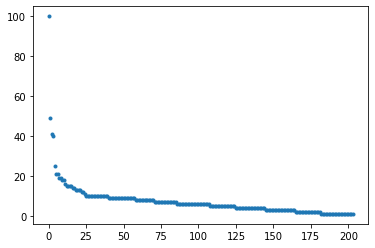

In [9]:
filenameCSV = 'num_friends.csv'
n = np.loadtxt(filenameCSV, delimiter=',', dtype=int)  # 204 integer values

plt.figure()
plt.plot(n, '.') # raw data plot (for scalar data)
plt.show()

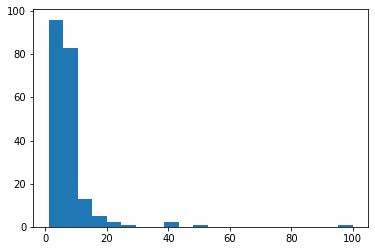

In [10]:
plt.figure()
plt.hist(n, bins=21)  # histogram with 21 bars
plt.show()

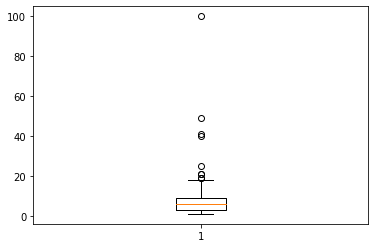

In [11]:
plt.figure()
plt.boxplot(n) # default box plot
plt.show()

Boxplots (by default) depict:

* Median  (colored horizontal line)
* Upper and lower [quartiles](https://en.wikipedia.org/wiki/Quartile)  (horizontal black lines)
* Range ("T"-shaped whiskers);  outliers excluded by default
* Outliers (dots)

Useful links:
* [Boxplot documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)
* [Boxplot option demo](https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html)

___

### Central tendency (using numpy and scipy.stats)

The main [central tendency](https://en.wikipedia.org/wiki/Central_tendency) variables are:

* Mean (arithmetic average)
* Median (50th percentile)
* Mode (most common value)

They can be calculated using NumPy and Scipy as follows:

In [12]:
x0     = np.mean( n )
x1     = np.median( n )
result = stats.mode( n ) # mode(s) and count(s)
x2     = result.mode

print("Mean        = ", x0)
print("Median      = ", x1)
print("Mode result = ", result)
print("Mode        = ", x2)

Mean        =  7.333333333333333
Median      =  6.0
Mode result =  ModeResult(mode=array([1]), count=array([22]))
Mode        =  [1]


___

### Adding reference lines to figures

Sometimes it is useful to add reference lines to figures to aid with data visualization.

Here is an example that uses vertical lines to help visualize the mean and median:

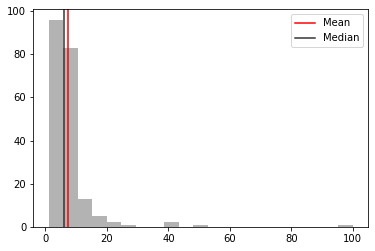

In [13]:
plt.figure()
plt.hist(n, bins=21, color='0.7')  # histogram with 21 bars
plt.axvline( np.mean(n) , color=(1,0,0), label='Mean' )
plt.axvline( np.median(n) , color='0.2', label='Median' )
plt.legend()
plt.show()

___

### Central tendency (using Python without numpy/scipy)

This section will repeat the central tendency analyses above, but will use neither `numpy` nor `scipy`.

This section is not necessary to know, but may be useful for improving your Python programming skills.

In [14]:
from collections import Counter


def my_mean(x):
    '''
    Calculate mean (without using NumPy)
    '''
    n  = len( x )  # number of elements
    s  = sum( x )  # sum of all elments
    return s / n


def my_median(x):
    '''
    Calculate median (without using NumPy)
    '''
    n        = len(x)
    sorted_x = sorted(x)
    midpoint = n // 2

    if n % 2 == 1:  # if odd, return the middle value
        md   = sorted_x[midpoint]
    else:           # if even, return the average of the middle values
        lo   = midpoint - 1
        hi   = midpoint
        return (sorted_x[lo] + sorted_x[hi]) / 2
    return md

def my_mode(x):
    '''
    Calculate mode (without using NumPy)
    '''
    counts    = Counter(x)
    max_count = max( counts.values() )
    md        = [xx for xx,count in counts.items() if (count==max_count)]
    return md




# Load data as a list:
filenameCSV = 'num_friends.csv' 
n  = np.loadtxt(filenameCSV, delimiter=',', dtype=int)  # 204 integer values
x  = list(n) # convert array to a list (so that no more NumPy commands will be used)



x0 = my_mean( x )
x1 = my_median( x )
x2 = my_mode( x )


print("Mean        = ", x0)
print("Median      = ", x1)
print("Mode        = ", x2)

Mean        =  7.333333333333333
Median      =  6.0
Mode        =  [6, 1]
